In [2]:
from rltensor.environments import TradeEnv
from rltensor.configs import eiie_config
from rltensor.agents import EIIE
import tensorflow as tf
import os
import pandas as pd

from pytrade_env.runners import RLEnv

class Context:
    commission_rate = 2.5e-3
    price_keys = ['open', 'high', 'low']
    volume_keys = ['volume', 'quoteVolume']
    initial_capital = 1.0


def train_model(start, end, load_file_path=None, save_file_path=None,
                num_epochs=int(2e6), init_frame=300):
    low_volume_ticker = ['USDT_BCH', 'USDT_ZEC']
    # Load data
    data_dir = "/home/tomoaki/work/Development/cryptocurrency/data"
    filenames = os.listdir(data_dir)
    symbols = []
    for name in filenames:
        if '.csv' in name and name.startswith('USD'):
            flag = True
            for tick in low_volume_ticker:
                if name.startswith(tick):
                    flag = False
            if flag:
                symbol = name.split('.')[0]
                symbols.append(symbol)
            
    context = Context()
    context.start = start
    context.end = end
    env = RLEnv(symbols, context)
    # env = TradeEnv(symbols, context.price_keys, context.volume_keys)

    conf = dict(
        action_spec={"type": "float", "shape": env.action_dim},
        # state_spec={"type": "float", "shape": (env.num_stocks, env.feature_dim)}
        state_spec={"type": "float", "shape": (env.num_stocks, 3)}
    )

    default_config = eiie_config()
    conf.update(default_config)

    fit_config = dict(
        start=start,
        end=end,
        num_epochs=num_epochs,
        log_freq=1000,
        # log_freq = 1
    )

    if save_file_path is None:
        save_file_path = 'params{}-{}/model.ckpt'.format(start, end)

    tf.reset_default_graph()
    eiie = EIIE(env=env, load_file_path=load_file_path, **conf)
    eiie.fit(**fit_config, save_file_path=save_file_path)
    return eiie

/home/tomoaki/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
training_start = '2015-07-01 00:00:00'
training_end = '2017-10-01 00:00:00'
load_file_path = 'params{}-{}/model.ckpt'.format(training_start, training_end)
# load_file_path = None


model = train_model(training_start, training_end, load_file_path=load_file_path, num_epochs=1)

delete
Building tensorflow graph...
INFO:tensorflow:Restoring parameters from params2015-07-01 00:00:00-2017-10-01 00:00:00/model.ckpt


[2018-01-28 21:15:10,764] Restoring parameters from params2015-07-01 00:00:00-2017-10-01 00:00:00/model.ckpt


Model restored.
Finished building tensorflow graph, spent time: 0.39610910415649414
Model saved in file: params2015-07-01 00:00:00-2017-10-01 00:00:00/model.ckpt


/home/tomoaki/anaconda3/lib/python3.6/site-packages/sqlalchemy/dialects/mysql/base.py:1546: Warning: (1287, "'@@tx_isolation' is deprecated and will be removed in a future release. Please use '@@transaction_isolation' instead")
  cursor.execute('SELECT @@tx_isolation')
26it [00:00, 259.75it/s]

start: 2015-07-01 00:30:00
end: 2017-10-01 00:00:00


39501it [01:59, 330.95it/s]
100%|██████████| 1/1 [00:00<00:00, 23.06it/s]

Finished storing data.
Model saved in file: params2015-07-01 00:00:00-2017-10-01 00:00:00/model.ckpt


In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

test_start = '2017-10-01 00:00:00'
test_end = '2017-12-31 00:00:00'
# load_file_path = 'params{}-{}/model.ckpt'.format(training_start, training_end)
load_file_path = None


model.play(start=test_start, end=test_end, num_epochs=1,
             save_file_path='test_params/model.ckpt',
             overwrite=True,
             log_freq=1,
             avg_length=100)

/home/tomoaki/anaconda3/lib/python3.6/site-packages/sqlalchemy/dialects/mysql/base.py:1546: Warning: (1287, "'@@tx_isolation' is deprecated and will be removed in a future release. Please use '@@transaction_isolation' instead")
  cursor.execute('SELECT @@tx_isolation')


Model saved in file: test_params/model.ckpt
start: 2017-10-01 00:30:00
end: 2017-12-31 00:00:00


4369it [01:06, 65.41it/s]

Model saved in file: test_params/model.ckpt


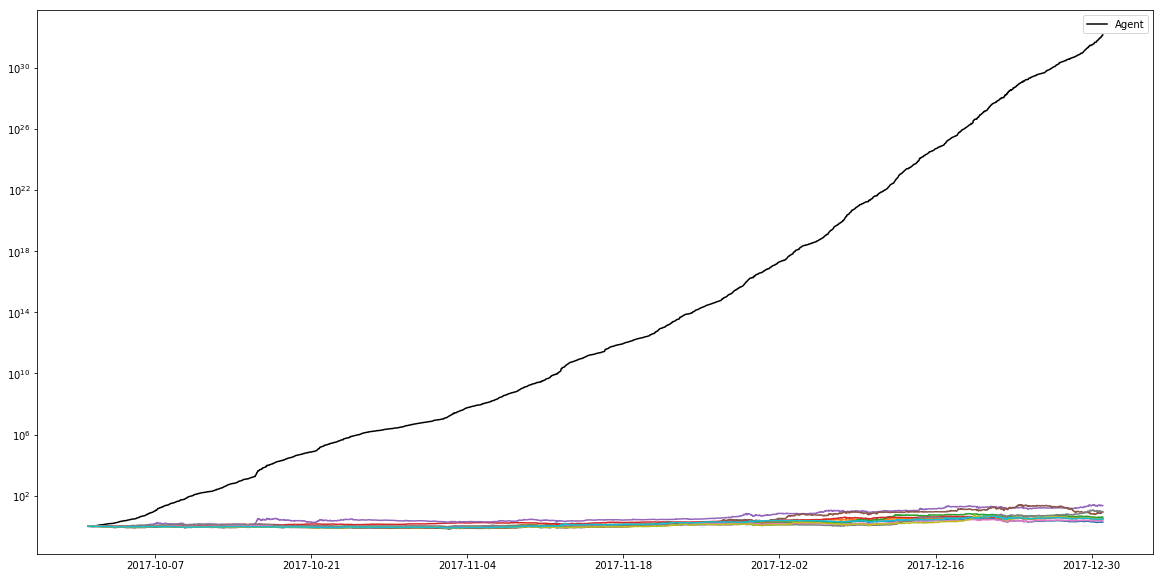

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df_ = model.env.data_handler.col_data['open']

df_ = df_.loc[(df_.index >= test_start) & (df_.index <=  test_end)]

# test_end = '2017-10-01 00:00:00'
df = df_.loc[(df_.index >= test_start) & (df_.index <=  test_end)]
agent_df = model.results['cumulative_returns'] / model.init_pv

df_val = df.values / df.values[0]
# index = np.argmax(df_val[-1])
# best_df = df_val[:, index]

fig, ax = plt.subplots(figsize=(20, 10))
# fig.figure(figsize=(20, 10))
# plt.plot(best_df)
ax.plot(agent_df, color='k', label="Agent")
for i in range(model.env.num_stocks):
# for i in range(3):
    ax.plot(pd.DataFrame(df_val[:, [i]], index=df.index))
    
ax.legend()
ax.set_yscale('log')
plt.savefig('{}-{}_test.png'.format(test_start, test_end))

In [3]:
from pytrade_env.utils import get_time_now

test_start = '2018-01-01 00:00:00'
test_end = '2018-01-01 00:00:00'
test_end = get_time_now()


model.play(start=test_start, end=test_end, num_epochs=1,
             save_file_path='test_params/model.ckpt',
             overwrite=True,
             log_freq=1,
             avg_length=100)

/home/tomoaki/anaconda3/lib/python3.6/site-packages/sqlalchemy/dialects/mysql/base.py:1546: Warning: (1287, "'@@tx_isolation' is deprecated and will be removed in a future release. Please use '@@transaction_isolation' instead")
  cursor.execute('SELECT @@tx_isolation')


Model saved in file: test_params/model.ckpt
start: 2018-01-01 00:00:00
end: 2018-01-20 12:30:00



0it [00:00, ?it/s]
8it [00:00, 74.85it/s]
16it [00:00, 74.57it/s]
23it [00:00, 71.78it/s]
31it [00:00, 71.70it/s]
39it [00:00, 71.80it/s]
46it [00:00, 70.88it/s]
54it [00:00, 71.88it/s]
62it [00:00, 73.03it/s]
70it [00:00, 73.81it/s]
78it [00:01, 74.23it/s]
86it [00:01, 73.59it/s]
94it [00:01, 71.76it/s]
102it [00:01, 72.46it/s]
110it [00:01, 69.92it/s]
117it [00:01, 69.17it/s]
124it [00:01, 68.39it/s]
132it [00:01, 70.30it/s]
140it [00:01, 72.27it/s]
148it [00:02, 73.22it/s]
156it [00:02, 72.27it/s]
164it [00:02, 71.18it/s]
172it [00:02, 72.03it/s]
180it [00:02, 70.53it/s]
188it [00:02, 70.89it/s]
196it [00:02, 71.40it/s]
204it [00:02, 72.82it/s]
212it [00:02, 73.08it/s]
220it [00:03, 73.24it/s]
228it [00:03, 73.31it/s]
236it [00:03, 73.00it/s]
244it [00:03, 73.81it/s]
252it [00:03, 71.90it/s]
260it [00:03, 70.93it/s]
268it [00:03, 70.55it/s]
276it [00:03, 71.03it/s]
284it [00:03, 71.05it/s]
292it [00:04, 69.38it/s]
299it [00:04, 68.91it/s]
307it [00:04, 70.77it/s]
315it [00:04, 70.2

********action
[  9.99976158e-01   6.82558365e-08   1.94352324e-05   2.07394649e-07
   2.19411504e-06   1.86062294e-08   1.69588887e-07   9.59232921e-07
   1.01381037e-09   6.23691179e-08   7.82135885e-07]
terminal
False
reward
[-0.03981481 -0.02452488 -0.0394532  -0.0296479  -0.03914796 -0.03617647
 -0.02411153 -0.04918149 -0.03546887 -0.0244854 ]
state
(50, 10, 3) [[[ 0.6943642   0.7347963   0.68056481]
  [ 0.7137971   0.74353865  0.70604051]
  [ 0.69729064  0.73955172  0.67980296]
  ..., 
  [ 0.52721767  0.56393832  0.51601423]
  [ 0.68469354  0.71701224  0.67461502]
  [ 0.7087275   0.72305152  0.69681325]]

 [[ 0.72222222  0.79817284  0.72098765]
  [ 0.72866193  0.77609375  0.72856973]
  [ 0.70727586  0.79911823  0.70515764]
  ..., 
  [ 0.53973903  0.58718861  0.53973903]
  [ 0.68877117  0.75138211  0.67462956]
  [ 0.70467321  0.76132835  0.70424896]]

 [[ 0.79444444  0.84962346  0.78395062]
  [ 0.77775332  0.8218184   0.77278351]
  [ 0.79802956  0.83995074  0.77347291]
  ..., 
  [

938it [00:12, 73.49it/s]


Model saved in file: test_params/model.ckpt


In [27]:
training_start = '2017-10-01 00:00:00'
training_end = '2017-12-31 00:00:00'
# load_file_path = 'params{}-{}/model.ckpt'.format(training_start, training_end)
load_file_path = None


model = train_model(training_start, training_end, load_file_path=load_file_path, num_epochs=1)

from pytrade_env.utils import get_time_now

test_start = '2017-10-01 00:00:00'
test_end = '2018-01-01 00:00:00'
test_end = get_time_now()

model.is_random = True
model.play(start=test_start, end=test_end, num_epochs=1,
             save_file_path='test_params/model.ckpt',
             overwrite=True,
             log_freq=1,
             avg_length=100)

delete
Building tensorflow graph...
Finished building tensorflow graph, spent time: 0.45120835304260254
Model saved in file: params2017-10-01 00:00:00-2017-12-31 00:00:00/model.ckpt


/home/tomoaki/anaconda3/lib/python3.6/site-packages/sqlalchemy/dialects/mysql/base.py:1546: Warning: (1287, "'@@tx_isolation' is deprecated and will be removed in a future release. Please use '@@transaction_isolation' instead")
  cursor.execute('SELECT @@tx_isolation')
62it [00:00, 619.33it/s]

start: 2017-10-01 00:00:00
end: 2017-12-31 00:00:00


4369it [00:07, 551.09it/s]
100%|██████████| 1/1 [00:00<00:00, 17.92it/s]


Finished storing data.
********action
[ 0.09261978  0.09068502  0.09225883  0.08847427  0.08951446  0.09016687
  0.09242547  0.09156951  0.09013066  0.08994867  0.09220649]
terminal
False
reward
[ 0.00458333  0.00309706  0.0006568  -0.00315838  0.00192026 -0.02481551
  0.00231559  0.          0.00279184  0.00445054]
state
(50, 10, 3) [[[ 1.075       1.08        1.06958333]
  [ 1.05779777  1.05780917  1.05211545]
  [ 1.05551907  1.05972646  1.05480624]
  ..., 
  [ 1.009       1.01579     1.009     ]
  [ 1.02339926  1.03109638  1.02339926]
  [ 1.07004966  1.07004966  1.06680188]]

 [[ 1.0725      1.0725      1.06666667]
  [ 1.05780917  1.06362143  1.05555904]
  [ 1.05972646  1.05972646  1.05455318]
  ..., 
  [ 1.0141      1.01965     1.01071   ]
  [ 1.03109638  1.03109638  1.01356781]
  [ 1.06680188  1.07541995  1.06680188]]

 [[ 1.06916667  1.06990833  1.05833333]
  [ 1.06056085  1.06313698  1.04939569]
  [ 1.05687131  1.05754163  1.04141715]
  ..., 
  [ 1.0115      1.019645    1.002665

8it [00:00, 72.77it/s]

start: 2017-10-01 00:00:00
end: 2018-01-20 12:30:00
********action
[ 0.09282964  0.09221019  0.09181385  0.09003302  0.09165768  0.09033432
  0.09004838  0.09126689  0.08921495  0.09046234  0.09012878]
terminal
False
reward
[-0.01427332 -0.01795895 -0.02235668 -0.03329927 -0.03964274 -0.01960784
 -0.02189594 -0.03773585 -0.02883156 -0.01944076]
state
(50, 10, 3) [[[ 1.10401388  1.11296822  1.10401388]
  [ 1.1292058   1.15834415  1.1292058 ]
  [ 1.15353947  1.16568619  1.14300747]
  ..., 
  [ 0.65291509  0.65518868  0.64622642]
  [ 1.13050076  1.15327618  1.12580273]
  [ 1.1184739   1.12449799  1.11345382]]

 [[ 1.11296822  1.11781405  1.09615567]
  [ 1.15802601  1.16579815  1.13760785]
  [ 1.16227077  1.16586762  1.14300747]
  ..., 
  [ 0.64987264  0.65377358  0.63778774]
  [ 1.14339909  1.14974962  1.12291351]
  [ 1.12188755  1.12449799  1.11345382]]

 [[ 1.1115054   1.11587809  1.10040218]
  [ 1.14154323  1.15277672  1.13575628]
  [ 1.14300747  1.15167528  1.1419325 ]
  ..., 
  [ 0.6

1008it [00:13, 75.60it/s]

********action
[ 0.0910991   0.09089009  0.09089009  0.09089009  0.09089009  0.09089009
  0.09089009  0.09089009  0.09089009  0.09089009  0.09089009]
terminal
False
reward
[  1.36740220e-03  -8.67279808e-03   8.27814570e-04   2.04211230e-03
   9.48895006e-03  -7.03167506e-03  -4.59921156e-03  -1.45052214e-02
  -4.00535573e-05  -1.38541573e-04]
state
(50, 10, 3) [[[ 1.0027348   1.0027348   1.00097416]
  [ 0.99343552  0.99522593  0.98792851]
  [ 0.99337748  0.99437583  0.98178808]
  ..., 
  [ 1.03279566  1.03279566  1.02535905]
  [ 1.03238616  1.03612831  1.03238616]
  [ 1.02347587  1.02478509  1.02001233]]

 [[ 1.00097416  1.00816866  1.00097416]
  [ 0.98792851  0.98970678  0.98785014]
  [ 0.98460265  0.9892351   0.98460265]
  ..., 
  [ 1.02535905  1.0276579   1.01756398]
  [ 1.03567055  1.03589943  1.03567055]
  [ 1.02124535  1.02124535  1.02124189]]

 [[ 1.00991143  1.01527379  1.00365534]
  [ 0.98785014  0.98970678  0.97994781]
  [ 0.9892351   0.99023675  0.9855745 ]
  ..., 
  [ 1.02

2008it [00:26, 70.77it/s]

********action
[ 0.08889783  0.09111021  0.09111021  0.09111021  0.09111021  0.09111021
  0.09111021  0.09111021  0.09111021  0.09111021  0.09111021]
terminal
False
reward
[-0.00638298 -0.00628232 -0.00173035 -0.00168196 -0.00977088 -0.01023133
  0.00861226 -0.00434718  0.01240046 -0.02617682]
state
(50, 10, 3) [[[ 1.01148936  1.0141844   1.0070922 ]
  [ 1.15005074  1.15200309  1.14628135]
  [ 1.12826706  1.1363754   1.1248167 ]
  ..., 
  [ 1.08427719  1.08427719  1.07148701]
  [ 1.09134449  1.09134449  1.08799769]
  [ 1.04497189  1.05218329  1.04150499]]

 [[ 1.0070922   1.01219858  0.99976596]
  [ 1.15200309  1.15952254  1.14983811]
  [ 1.12708186  1.13792806  1.1250496 ]
  ..., 
  [ 1.07155109  1.07989551  1.07155109]
  [ 1.09134449  1.09134449  1.08517023]
  [ 1.05202556  1.05409813  1.04150499]]

 [[ 1.0070922   1.01762411  1.00205674]
  [ 1.15952254  1.18494177  1.15836273]
  [ 1.13681704  1.14917623  1.12999224]
  ..., 
  [ 1.07989551  1.08253734  1.07693824]
  [ 1.09134449  1.0

3008it [00:40, 75.44it/s]

********action
[ 0.08198778  0.09180123  0.09180123  0.09180123  0.09180123  0.09180123
  0.09180123  0.09180123  0.09180123  0.09180123  0.09180123]
terminal
False
reward
[ 0.00674116  0.01086957  0.0142494   0.0047182   0.00131926  0.01131712
  0.00658202  0.00619835 -0.01818228 -0.00427775]
state
(50, 10, 3) [[[ 0.80851351  0.82226533  0.77943539]
  [ 0.8658913   0.87846739  0.83695652]
  [ 0.87773645  0.8799642   0.84255222]
  ..., 
  [ 0.9229876   0.9229876   0.90745455]
  [ 0.865875    0.86739781  0.84523644]
  [ 0.94424187  0.94944568  0.91245337]]

 [[ 0.78369427  0.79787517  0.773407  ]
  [ 0.83695652  0.85751087  0.83610326]
  [ 0.84219617  0.85428066  0.82782552]
  ..., 
  [ 0.90745455  0.9164876   0.9046157 ]
  [ 0.85629882  0.86289892  0.84213224]
  [ 0.91553409  0.92471048  0.8977009 ]]

 [[ 0.79382906  0.81205962  0.78546378]
  [ 0.84664674  0.89786413  0.84664674]
  [ 0.84502136  0.86530474  0.84502136]
  ..., 
  [ 0.91473554  0.93207851  0.91278099]
  [ 0.86289892  0.8

4007it [00:53, 67.86it/s]

********action
[ 0.07538601  0.09246139  0.09246139  0.09246139  0.09246139  0.09246139
  0.09246139  0.09246139  0.09246139  0.09246139  0.09246139]
terminal
False
reward
[-0.01145156 -0.02764401 -0.01156855 -0.00348234 -0.00709053  0.03503319
  0.00152672 -0.01336598 -0.00698756 -0.02780196]
state
(50, 10, 3) [[[ 1.4207765   1.44001399  1.4207765 ]
  [ 1.39591588  1.41409936  1.39591588]
  [ 1.26435484  1.28032258  1.26209677]
  ..., 
  [ 0.97847158  0.99763085  0.96010611]
  [ 1.45774463  1.47720151  1.44492929]
  [ 1.32081505  1.33903288  1.32081505]]

 [[ 1.43791536  1.4463099   1.43756558]
  [ 1.39901859  1.40505943  1.39030783]
  [ 1.26459677  1.27016129  1.25578629]
  ..., 
  [ 0.98969493  0.99755127  0.95908581]
  [ 1.45229811  1.46895805  1.44492929]
  [ 1.33236219  1.33857988  1.32703274]]

 [[ 1.44456104  1.45033928  1.42109129]
  [ 1.39885401  1.40801585  1.39030783]
  [ 1.26814516  1.28427419  1.26440323]
  ..., 
  [ 0.97132946  0.98969391  0.95821651]
  [ 1.4523718   1.4

5012it [01:07, 71.80it/s]

********action
[ 0.07403178  0.09259682  0.09259682  0.09259682  0.09259682  0.09259682
  0.09259682  0.09259682  0.09259682  0.09259682  0.09259682]
terminal
False
reward
[ -2.10269240e-02  -6.78202790e-03  -7.26105105e-03  -6.20437956e-03
  -1.37682453e-02   2.41597917e-02  -7.74044796e-03  -2.01064860e-02
   4.73933649e-05  -7.01222494e-03]
state
(50, 10, 3) [[[ 0.97390994  1.00667143  0.95397308]
  [ 0.99124507  1.01181036  0.96886113]
  [ 0.96075351  0.98691213  0.95044418]
  ..., 
  [ 0.78896418  0.83688287  0.77928364]
  [ 0.86353839  0.87996209  0.83783033]
  [ 0.96679609  0.97712958  0.95273447]]

 [[ 1.00667143  1.01803967  0.99207172]
  [ 1.00739366  1.01301738  0.98938312]
  [ 0.98691213  1.00193942  0.97602911]
  ..., 
  [ 0.82338335  0.84172314  0.82284608]
  [ 0.87851754  0.88710142  0.86729858]
  [ 0.97712958  1.00309046  0.97712958]]

 [[ 1.00964975  1.02424351  1.00226948]
  [ 1.00808918  1.01540976  0.99264694]
  [ 0.98806379  1.01123836  0.98255378]
  ..., 
  [ 0.83

5354it [01:12, 73.67it/s]

Model saved in file: test_params/model.ckpt


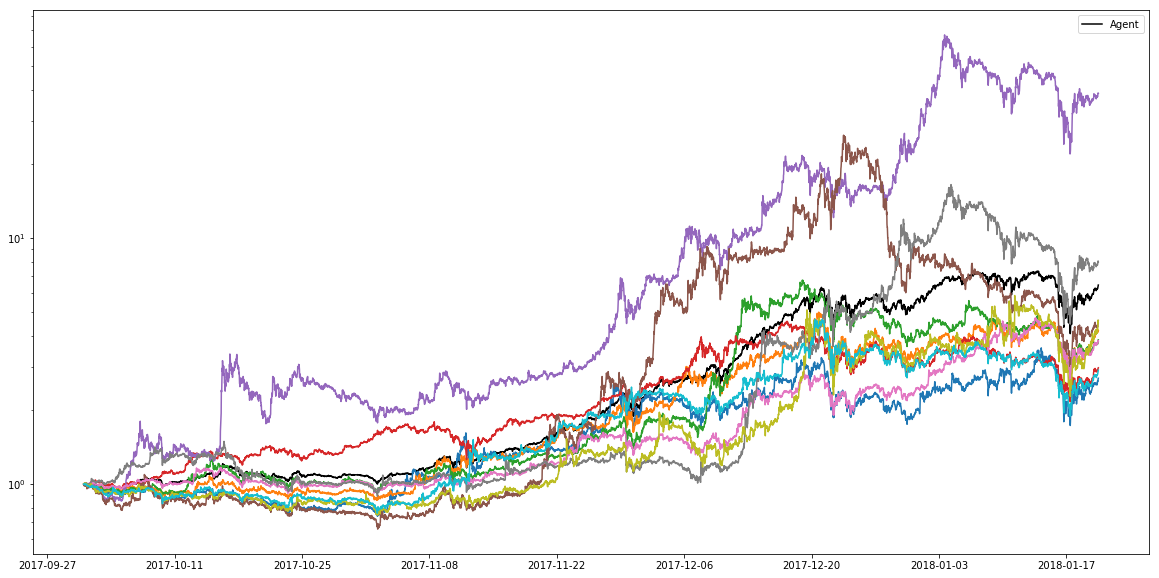

In [30]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df_ = model.env.data_handler.col_data['open']

# df_ = df_.loc[(df_.index >= test_start) & (df_.index <=  test_end)]

test_start = '2018-01-01 00:00:00'
test_start = '2017-10-01 00:00:00'
test_end = '2018-01-07 00:00:00'
test_end  = get_time_now()
df = df_.loc[(df_.index >= test_start) & (df_.index <=  test_end)]
agent_df = model.results['cumulative_returns'] / model.init_pv
agent_df = agent_df.loc[(agent_df.index >= test_start) & (agent_df.index <=  test_end)]

df_val = df.values / df.values[0]
# index = np.argmax(df_val[-1])
# best_df = df_val[:, index]

fig, ax = plt.subplots(figsize=(20, 10))
# fig.figure(figsize=(20, 10))
# plt.plot(best_df)
ax.plot(agent_df, color='k', label="Agent")
for i in range(model.env.num_stocks):
# for i in range(3):
    ax.plot(pd.DataFrame(df_val[:, [i]], index=df.index))
    
ax.legend()
ax.set_yscale('log')
plt.show()
# plt.savefig('{}-{}_test.png'.format(test_start, test_end))

In [14]:
agent_df

,0
2018-01-07 00:00:00,12.825023
2018-01-07 00:30:00,12.921281
2018-01-07 01:00:00,13.041571
2018-01-07 01:30:00,12.986825
2018-01-07 02:00:00,12.954045
2018-01-07 02:30:00,13.532179
2018-01-07 03:00:00,13.593147
2018-01-07 03:30:00,13.766686
2018-01-07 04:00:00,13.734872
2018-01-07 04:30:00,13.804402


In [12]:
model.results['cumulative_returns']

,0
2018-01-01 00:00:00,0.999896
2018-01-01 00:30:00,0.999715
2018-01-01 01:00:00,1.000091
2018-01-01 01:30:00,1.000581
2018-01-01 02:00:00,1.000681
2018-01-01 02:30:00,1.000503
2018-01-01 03:00:00,1.000077
2018-01-01 03:30:00,1.000398
2018-01-01 04:00:00,1.000019
2018-01-01 04:30:00,1.000279


In [9]:
model.env.data

AttributeError: 'TradeEnv' object has no attribute 'data'

In [12]:
training_start = '2015-04-01 00:00:00'
training_end = '2017-07-01 00:00:00'
# load_file_path = 'params{}-{}/model.ckpt'.format(training_start, training_end)
load_file_path = None


model = train_model(training_start, training_end, load_file_path=load_file_path)

delete
Building tensorflow graph...


0it [00:00, ?it/s]

Finished building tensorflow graph, spent time: 0.3580138683319092
Model saved in file: params2015-04-01 00:00:00-2017-07-01 00:00:00/model.ckpt


39452it [00:06, 5871.54it/s]
  0%|          | 7/2000000 [00:00<8:49:06, 63.00it/s]

Finished storing data.


100%|██████████| 2000000/2000000 [5:54:07<00:00, 95.07it/s]  


Model saved in file: params2015-04-01 00:00:00-2017-07-01 00:00:00/model.ckpt


In [13]:
test_start = '2017-07-01 00:00:00'
test_end = '2017-11-01 00:00:00'


model.play(start=test_start, end=test_end, num_epochs=1,
             save_file_path='test_params/model.ckpt',
             overwrite=True,
             log_freq=1,
             avg_length=100)

8it [00:00, 78.75it/s]

Model saved in file: test_params/model.ckpt


5904it [01:17, 73.64it/s]

Model saved in file: test_params/model.ckpt


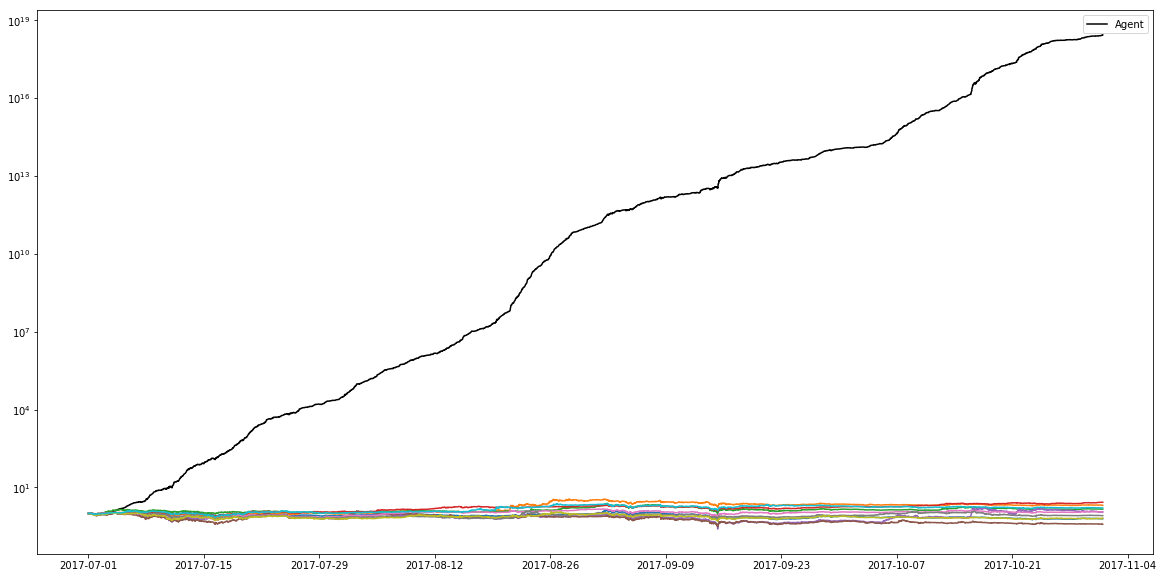

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df_ = model.env.dfs['open']

df_ = df_.loc[(df_.index >= test_start) & (df_.index <=  test_end)]

# test_end = '2017-10-01 00:00:00'
df = df_.loc[(df_.index >= test_start) & (df_.index <=  test_end)]
agent_df = model.results['cumulative_returns'] / model.init_pv

df_val = df.values / df.values[0]
# index = np.argmax(df_val[-1])
# best_df = df_val[:, index]

fig, ax = plt.subplots(figsize=(20, 10))
# fig.figure(figsize=(20, 10))
# plt.plot(best_df)
ax.plot(agent_df, color='k', label="Agent")
for i in range(model.env.num_stocks):
# for i in range(3):
    ax.plot(pd.DataFrame(df_val[:, [i]], index=df.index))
    
ax.legend()
ax.set_yscale('log')
plt.savefig('{}-{}_test.png'.format(test_start, test_end))

In [15]:
training_start = '2015-02-01 00:00:00'
training_end = '2017-05-01 00:00:00'
# load_file_path = 'params{}-{}/model.ckpt'.format(training_start, training_end)
load_file_path = None


model = train_model(training_start, training_end, load_file_path=load_file_path)

delete
Building tensorflow graph...


0it [00:00, ?it/s]

Finished building tensorflow graph, spent time: 0.3416922092437744
Model saved in file: params2015-02-01 00:00:00-2017-05-01 00:00:00/model.ckpt


38290it [00:06, 5873.80it/s]
  0%|          | 4/2000000 [00:00<13:58:46, 39.74it/s]

Finished storing data.


100%|██████████| 2000000/2000000 [5:59:09<00:00, 92.81it/s]  


Model saved in file: params2015-02-01 00:00:00-2017-05-01 00:00:00/model.ckpt


In [16]:
test_start = '2017-05-01 00:00:00'
test_end = '2017-09-01 00:00:00'


model.play(start=test_start, end=test_end, num_epochs=1,
             save_file_path='test_params/model.ckpt',
             overwrite=True,
             log_freq=1,
             avg_length=100)

0it [00:00, ?it/s]

Model saved in file: test_params/model.ckpt


5904it [01:15, 78.35it/s]

Model saved in file: test_params/model.ckpt


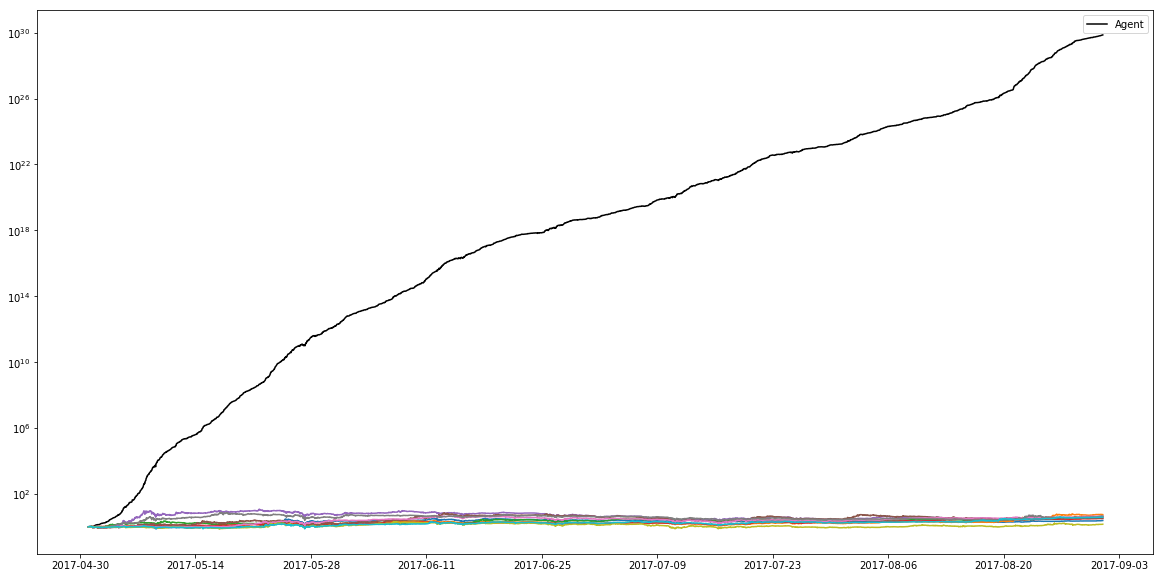

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df_ = model.env.dfs['open']

df_ = df_.loc[(df_.index >= test_start) & (df_.index <=  test_end)]

# test_end = '2017-10-01 00:00:00'
df = df_.loc[(df_.index >= test_start) & (df_.index <=  test_end)]
agent_df = model.results['cumulative_returns'] / model.init_pv

df_val = df.values / df.values[0]
# index = np.argmax(df_val[-1])
# best_df = df_val[:, index]

fig, ax = plt.subplots(figsize=(20, 10))
# fig.figure(figsize=(20, 10))
# plt.plot(best_df)
ax.plot(agent_df, color='k', label="Agent")
for i in range(model.env.num_stocks):
# for i in range(3):
    ax.plot(pd.DataFrame(df_val[:, [i]], index=df.index))
    
ax.legend()
ax.set_yscale('log')
plt.savefig('{}-{}_test.png'.format(test_start, test_end))

In [12]:
model.results['actions'].values[2112][1:] * model.results['price_returns'].values[2112]

array([  2.15469439e-12,   3.09740210e-12,   1.51415152e+03,
        -4.35135277e-12,  -4.08609581e-12,  -2.40407221e-11,
        -4.96865126e-11,  -8.26901121e-12,  -2.27023133e-11,
        -1.86774563e-11,  -9.87927478e-12])

In [13]:
model.results['actions'].values[2112]

array([  0.00000000e+00,   7.24382165e-10,   7.28311189e-10,
         1.00000000e+00,   7.41342654e-10,   7.61929742e-10,
         7.13385684e-10,   6.66205369e-10,   6.90907109e-10,
         6.44737375e-10,   7.65056296e-10,   7.62077956e-10])

In [14]:
model.results['price_returns'].values[2112]

array([  2.97452711e-03,   4.25285530e-03,   1.51415152e+03,
        -5.86955674e-03,  -5.36282493e-03,  -3.36994737e-02,
        -7.45813753e-02,  -1.19683400e-02,  -3.52117222e-02,
        -2.44131790e-02,  -1.29636013e-02])

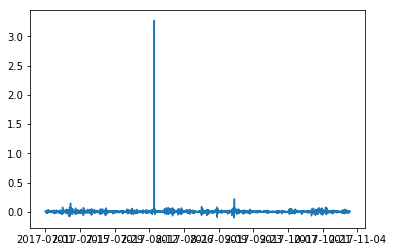

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(model.results['cumulative_returns'].pct_change())

In [12]:
np.sum(model.results['actions'].values[2112] * model.results['returns'].values[2112])

3.277692276512886

In [9]:
import numpy as np
np.min(model.results['price_returns'].values)

-0.30263791448671673

In [2]:
import os
import pandas as pd

data_dir = "/home/tomoaki/work/Development/cryptocurrency/data"
filenames = os.listdir(data_dir)
data = {}
for name in filenames:
    if '.csv' in name and name.startswith('USD') and not name.startswith('USDT_ZEC'):
        filepath = os.path.join(data_dir, name)
        df = pd.read_csv(filepath)
        symbol = name.split('.')[0]
        data[symbol] = df
        
shapes =  []
for key in data.keys():
    shapes.append(data[key].shape + (key,))
shapes = sorted(shapes, key=lambda x: x[0], reverse=True)
symbols = [x[2] for x in shapes]

In [3]:
from rltensor.environments import TradeEnv
from rltensor.configs import eiie_config
from rltensor.agents import EIIE
import tensorflow as tf


training_start = '2015-09-01 00:00:00'
training_end = '2017-09-01 00:00:00'
# training_end = '2017-06-01 00:00:00'

commission_rate  = 2.5e-3
env = TradeEnv(data, start=training_start, end=training_end,
               commission_rate=commission_rate, price_keys=['open', 'high', 'low'])

conf = dict(
    action_spec={"type": "float", "shape": env.action_dim},
    # state_spec={"type": "float", "shape": (env.num_stocks, env.feature_dim)}
    state_spec={"type": "float", "shape": (env.num_stocks, 3)}
)

default_config = eiie_config()
conf.update(default_config)

fit_config = dict(
    start=training_start,
    end=training_end,
    # num_epochs=int(2e6),
    num_epochs=1,
    log_freq=100,
    # log_freq = 1
)

lr_spec={"lr_init": 3.0e-3, "lr_decay_step": 5 * 1000,
                 "lr_decay": 0.96, "lr_min": 3.0e-3}
# conf['lr_spec'] = lr_spec

load_file_path = 'params/model.ckpt'
# load_file_path = None

tf.reset_default_graph()
eiie = EIIE(env=env, load_file_path=load_file_path, **conf)
eiie.fit(**fit_config, save_file_path='test_params/model.ckpt')

Building tensorflow graph...
INFO:tensorflow:Restoring parameters from params/model.ckpt


[2018-01-14 12:25:42,273] Restoring parameters from params/model.ckpt
0it [00:00, ?it/s]

Model restored.
Finished building tensorflow graph, spent time: 0.3360722064971924
Model saved in file: test_params/model.ckpt


35084it [00:05, 5918.52it/s]
100%|██████████| 1/1 [00:00<00:00, 22.24it/s]

Finished storing data.
Model saved in file: test_params/model.ckpt


In [4]:
test_start = '2017-09-01 00:00:00'
test_end = '2018-01-01 00:00:00'
# test_start = '2017-06-01 00:00:00'
# test_end = '2017-09-01 00:00:00'


eiie.play(start=test_start, end=test_end, num_epochs=1,
             save_file_path='test_params/model.ckpt',
             overwrite=True,
             log_freq=1,
             avg_length=100)

0it [00:00, ?it/s]

Model saved in file: test_params/model.ckpt


842it [00:11, 71.53it/s]

********action
[  2.41364498e-04   9.64576900e-01   5.86342998e-03   1.13739993e-03
   9.46824512e-05   1.13628968e-03   7.85583165e-03   2.60919507e-04
   2.58128712e-04   1.55877590e-03   9.00479645e-05   1.69262849e-02]


1842it [00:25, 70.74it/s]

********action
[  4.29040620e-06   2.29802458e-06   2.47040771e-06   1.12376001e-05
   2.85201463e-06   4.38301186e-06   1.02197228e-03   9.98914123e-01
   3.98761995e-06   4.85602322e-06   7.28770328e-06   2.02784977e-05]


2844it [00:39, 68.91it/s]

********action
[ 0.00931521  0.19028446  0.07019302  0.04920239  0.00582917  0.06674854
  0.01484066  0.00633541  0.04043723  0.52979463  0.00661468  0.01040469]


3844it [00:53, 71.08it/s]

********action
[  1.26158357e-05   6.73361910e-06   7.43264332e-03   1.21496905e-05
   2.19987892e-03   2.25290132e-05   7.55696222e-02   9.14682567e-01
   2.56928961e-05   1.96084093e-05   7.61677711e-06   8.35904484e-06]


4846it [01:07, 63.57it/s]

********action
[  2.03641889e-07   1.46397285e-03   5.09301171e-05   8.22899074e-06
   2.85081230e-02   9.57847922e-04   8.20509798e-04   6.58751726e-01
   2.07457461e-07   3.21127067e-04   3.09116960e-01   1.32737938e-07]


5843it [01:21, 71.11it/s]

********action
[ 0.16001295  0.13613831  0.07713773  0.11717308  0.049117    0.0549548
  0.058031    0.11342451  0.06714851  0.06531879  0.04611873  0.05542463]


5856it [01:22, 71.40it/s]

Model saved in file: test_params/model.ckpt


In [8]:
for key in eiie.results.keys():
    if key not in ['cumulative_returns', 'drawdowns']:
        print(key)
        print(eiie.results[key])

sharp_ratio
0.534358510009
maximum_drawdows
0.144408288315


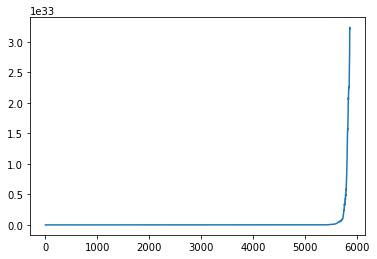

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(eiie.test_cumulative_returns)

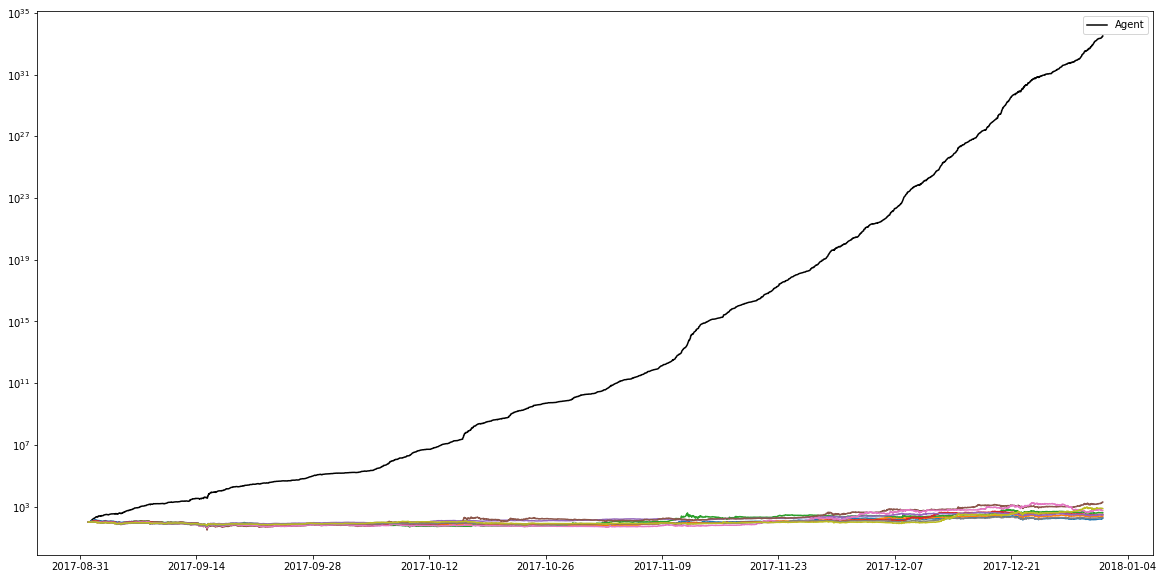

In [16]:
import numpy as np

df_ = env.dfs['close']

test_start = '2017-09-01 00:00:00'
test_end = '2018-01-01 00:00:00'
# test_start = '2017-07-01 00:00:00'
# test_end = '2017-08-01 00:00:00'
# test_end = '2017-12-01 00:00:00'

df_ = df_.loc[(df_.index >= test_start) & (df_.index <=  test_end)]

# test_end = '2017-10-01 00:00:00'
df = df_.loc[(df_.index >= test_start) & (df_.index <=  test_end)]
agent_df = pd.DataFrame(eiie.test_cumulative_returns, index=df_.index[1:])
agent_df = agent_df.loc[(agent_df.index >= test_start) & (agent_df.index <=  test_end)]


df_val = df.values / df.values[0] * 100
# index = np.argmax(df_val[-1])
# best_df = df_val[:, index]

fig, ax = plt.subplots(figsize=(20, 10))
# fig.figure(figsize=(20, 10))
# plt.plot(best_df)
ax.plot(agent_df, color='k', label="Agent")
for i in range(9):
    ax.plot(pd.DataFrame(df_val[:, [i]], index=df.index))
ax.legend()
ax.set_yscale('log')
plt.savefig('2017-09-01 00:00:00-2018-01-01 00:00:00_test.png')

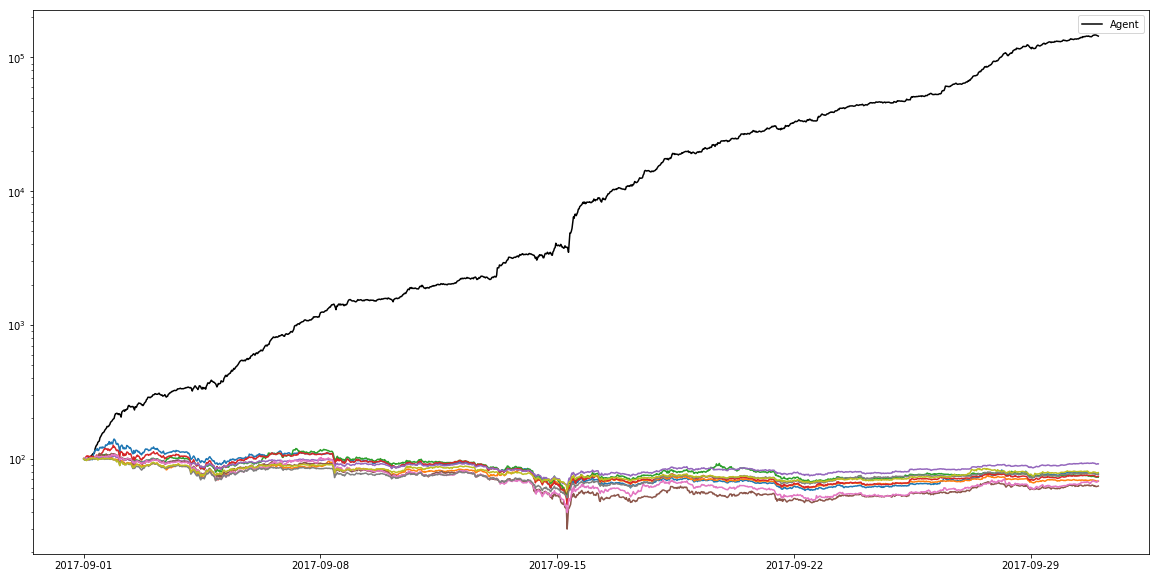

In [17]:
import numpy as np

df_ = env.dfs['close']

test_start = '2017-09-01 00:00:00'
test_end = '2018-01-01 00:00:00'
# test_start = '2017-07-01 00:00:00'
# test_end = '2017-08-01 00:00:00'
# test_end = '2017-12-01 00:00:00'

df_ = df_.loc[(df_.index >= test_start) & (df_.index <=  test_end)]

test_end = '2017-10-01 00:00:00'
df = df_.loc[(df_.index >= test_start) & (df_.index <=  test_end)]
agent_df = pd.DataFrame(eiie.test_cumulative_returns, index=df_.index[1:])
agent_df = agent_df.loc[(agent_df.index >= test_start) & (agent_df.index <=  test_end)]


df_val = df.values / df.values[0] * 100
# index = np.argmax(df_val[-1])
# best_df = df_val[:, index]

fig, ax = plt.subplots(figsize=(20, 10))
# fig.figure(figsize=(20, 10))
# plt.plot(best_df)
ax.plot(agent_df, color='k', label="Agent")
for i in range(9):
    ax.plot(pd.DataFrame(df_val[:, [i]], index=df.index))
ax.legend()
ax.set_yscale('log')
plt.savefig('2017-09-01 00:00:00-2017-10-01 00:00:00_test.png')

In [9]:
eiie.results['cumulative_returns'][-1]

162185.4188057186

In [3]:
x = tf.Variable([2, 3])

In [6]:
x.get_shape().as_list()

[2]

In [24]:
data['USDT_BCH'].keys()

Index(['date', 'high', 'low', 'open', 'close', 'volume', 'quoteVolume',
       'weightedAverage'],
      dtype='object')

In [28]:
import numpy as np
np.mean([750.000001, 200.000000, 600.000000, 540.000000])
np.mean([200.000000, 600.000000, 540.000000])

446.66666666666669

In [29]:
436149.877928 / 994.980943

438.34998147095166

In [9]:
np.exp(0.1) - 1

0.10517091807564771

In [12]:
def get_data():
    low_volume_ticker = ['USDT_BCH', 'USDT_ZEC']
    # Load data
    data_dir = "/home/tomoaki/work/Development/cryptocurrency/data"
    filenames = os.listdir(data_dir)
    data = {}
    for name in filenames:
        if '.csv' in name and name.startswith('USD'):
            flag = True
            for tick in low_volume_ticker:
                if name.startswith(tick):
                    flag = False
            if flag:
                filepath = os.path.join(data_dir, name)
                df = pd.read_csv(filepath)
                symbol = name.split('.')[0]
                data[symbol] = df
    return data

In [20]:
from collections import defaultdict
from rltensor.environments.utils import seconds2date
import pandas as pd


init_frame = 300
data = get_data()
symbols = list(data.keys())
# Build imputed data with columns key
dfs = defaultdict(lambda: [])
for symbol, val in data.items():
    dates = val["date"].values[init_frame:]
    dates = pd.DatetimeIndex([seconds2date(d) for d in dates])
    df = pd.DataFrame(val.values[init_frame:],
                        index=dates, columns=val.columns)
    df = df.loc[~df.index.duplicated(keep='first')]
    for col in val.columns:
        if col != 'date':
            dfs[col].append(df[col])
for col in dfs.keys():
    df = pd.concat(dfs[col], axis=1, keys=symbols)
    df.interpolate(method='linear',
                           limit_direction='both',
                           inplace=True)
    dfs[col] = df

In [22]:
dfs['close']

,USDT_ETC,USDT_XMR,USDT_LTC,USDT_BTC,USDT_STR,USDT_NXT,USDT_ETH,USDT_XRP,USDT_REP,USDT_DASH
2015-02-23 04:00:00,2.580066,0.295000,2.649990,237.750000,0.000300,0.006000,2.150000,0.002500,6.701030,9.999997
2015-02-23 04:30:00,2.580066,0.295000,2.649990,237.750000,0.000300,0.006000,2.150000,0.002500,6.701030,9.999997
2015-02-23 05:00:00,2.580066,0.295000,2.649990,237.750000,0.000300,0.006000,2.150000,0.002500,6.701030,9.999997
2015-02-23 05:30:00,2.580066,0.295000,2.649990,237.750000,0.000300,0.006000,2.150000,0.002500,6.701030,9.999997
2015-02-23 06:00:00,2.580066,0.295000,2.649990,237.750000,0.000300,0.006000,2.150000,0.002500,6.701030,9.999997
2015-02-23 06:30:00,2.580066,0.295000,2.649990,237.750000,0.000300,0.006000,2.150000,0.002500,6.701030,9.999997
2015-02-23 07:00:00,2.580066,0.295000,2.649990,237.750000,0.000300,0.006000,2.150000,0.002500,6.701030,9.999997
2015-02-23 07:30:00,2.580066,0.295000,2.649990,237.750000,0.000300,0.006000,2.150000,0.002500,6.701030,9.999997
2015-02-23 08:00:00,2.580066,0.295000,2.649990,237.750000,0.000300,0.006000,2.150000,0.002500,6.701030,9.999997
2015-02-23 08:30:00,2.580066,0.295000,2.649990,237.750000,0.000300,0.006000,2.150000,0.002500,6.701030,9.999997


In [25]:
df = data['USDT_BTC']
for x in df:
    print(x)

date
high
low
open
close
volume
quoteVolume
weightedAverage


In [29]:
df.values[0]

array([  1.42437240e+09,   2.25000000e+02,   2.25000000e+02,
         2.25000000e+02,   2.25000000e+02,   9.99999000e-01,
         4.44444000e-03,   2.25000000e+02])

In [28]:
df

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1424372400,225.000000,225.000000,225.000000,225.000000,9.999990e-01,0.004444,225.000000
1,1424374200,225.000000,225.000000,225.000000,225.000000,0.000000e+00,0.000000,225.000000
2,1424376000,240.000000,225.000000,225.000000,240.000000,3.062465e+01,0.128625,238.092076
3,1424377800,244.000000,244.000000,244.000000,244.000000,1.465123e+01,0.060046,244.000000
4,1424379600,244.000000,244.000000,244.000000,244.000000,0.000000e+00,0.000000,244.000000
5,1424381400,244.000000,244.000000,244.000000,244.000000,0.000000e+00,0.000000,244.000000
6,1424383200,244.000000,244.000000,244.000000,244.000000,0.000000e+00,0.000000,244.000000
7,1424385000,244.000000,244.000000,244.000000,244.000000,4.367600e-04,0.000002,244.000000
8,1424386800,244.000000,244.000000,244.000000,244.000000,0.000000e+00,0.000000,244.000000
9,1424388600,244.000000,244.000000,244.000000,244.000000,0.000000e+00,0.000000,244.000000


In [1]:
from pytrade_env.data_handlers import HistoricSQLDataHandler

symbols = ["USDT_ETC", "USDT_XMR", "USDT_LTC", "USDT_BTC", "USDT_STR", "USDT_NXT"]

data_handler = HistoricSQLDataHandler(None, symbols)

In [2]:
start = '2017-10-01 00:00:00'
end = '2017-12-31 00:00:00'

data_handler.set_trange(start, end)
col_data1 = data_handler.col_data
price_data1 = data_handler.price_data

/home/tomoaki/anaconda3/lib/python3.6/site-packages/sqlalchemy/dialects/mysql/base.py:1546: Warning: (1287, "'@@tx_isolation' is deprecated and will be removed in a future release. Please use '@@transaction_isolation' instead")
  cursor.execute('SELECT @@tx_isolation')


start: 2017-10-01 00:30:00
end: 2017-12-31 00:00:00


In [3]:
data_handler.update_data()

/home/tomoaki/anaconda3/lib/python3.6/site-packages/sqlalchemy/dialects/mysql/base.py:1546: Warning: (1287, "'@@tx_isolation' is deprecated and will be removed in a future release. Please use '@@transaction_isolation' instead")
  cursor.execute('SELECT @@tx_isolation')


start: 2017-10-01 00:30:00
end: 2018-01-20 12:30:00


In [4]:
data_handler.allow_time_index.append(data_handler.df.index)

DatetimeIndex(['2017-10-01 00:30:00', '2017-10-01 01:00:00',
               '2017-10-01 01:30:00', '2017-10-01 02:00:00',
               '2017-10-01 02:30:00', '2017-10-01 03:00:00',
               '2017-10-01 03:30:00', '2017-10-01 04:00:00',
               '2017-10-01 04:30:00', '2017-10-01 05:00:00',
               ...
               '2018-01-20 08:00:00', '2018-01-20 08:30:00',
               '2018-01-20 09:00:00', '2018-01-20 09:30:00',
               '2018-01-20 10:00:00', '2018-01-20 10:30:00',
               '2018-01-20 11:00:00', '2018-01-20 11:30:00',
               '2018-01-20 12:00:00', '2018-01-20 12:30:00'],
              dtype='datetime64[ns]', length=6338, freq=None)

In [4]:
data_handler.allow_time_index

DatetimeIndex(['2017-10-01 00:30:00', '2017-10-01 01:00:00',
               '2017-10-01 01:30:00', '2017-10-01 02:00:00',
               '2017-10-01 02:30:00', '2017-10-01 03:00:00',
               '2017-10-01 03:30:00', '2017-10-01 04:00:00',
               '2017-10-01 04:30:00', '2017-10-01 05:00:00',
               ...
               '2017-12-30 19:30:00', '2017-12-30 20:00:00',
               '2017-12-30 20:30:00', '2017-12-30 21:00:00',
               '2017-12-30 21:30:00', '2017-12-30 22:00:00',
               '2017-12-30 22:30:00', '2017-12-30 23:00:00',
               '2017-12-30 23:30:00', '2017-12-31 00:00:00'],
              dtype='datetime64[ns]', length=4368, freq='30T')

In [1]:
start = '2018-01-01 00:00:00'
end = '2018-01-31 00:00:00'

data_handler.set_trange(start, end)
col_data2 = data_handler.col_data
price_data2 = data_handler.price_data

NameError: name 'data_handler' is not defined

In [20]:
col_data1["close"].index.append(col_data2["close"].index)

DatetimeIndex(['2018-01-01 00:30:00', '2018-01-01 01:00:00',
               '2018-01-01 01:30:00', '2018-01-01 02:00:00',
               '2018-01-01 02:30:00', '2018-01-01 03:00:00',
               '2018-01-01 03:30:00', '2018-01-01 04:00:00',
               '2018-01-01 04:30:00', '2018-01-01 05:00:00',
               ...
               '2018-01-20 08:00:00', '2018-01-20 08:30:00',
               '2018-01-20 09:00:00', '2018-01-20 09:30:00',
               '2018-01-20 10:00:00', '2018-01-20 10:30:00',
               '2018-01-20 11:00:00', '2018-01-20 11:30:00',
               '2018-01-20 12:00:00', '2018-01-20 12:30:00'],
              dtype='datetime64[ns]', length=1874, freq=None)